# Bootstrap for OLS — Train/Test MSE vs Degree

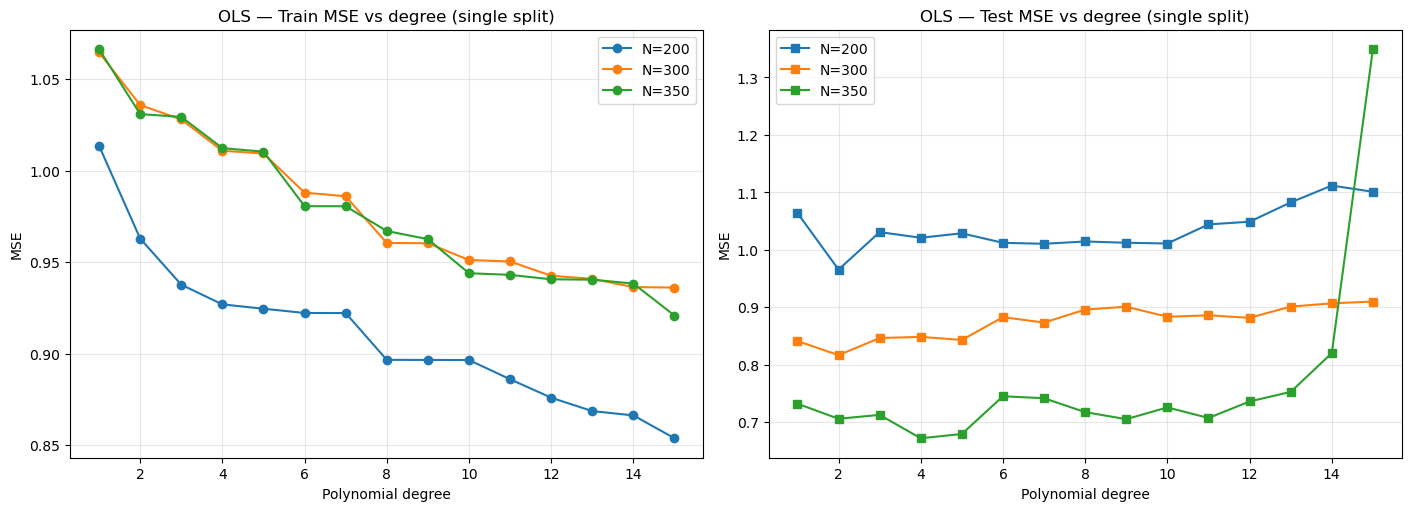

In [2]:
# OLS — Train/Test MSE vs degree for multiple N (single split per N)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from mlmods.metrics_utils import mse
from mlmods.data_utils import runge, prepare_design_from_indices  # <- uses your helper

# Repro
SEED = 3155
np.random.seed(SEED)

Ns = [200, 300, 350]
degree_range = range(1, 16)

# Store curves per N
curves_train = {}  # N -> list of train MSE per degree
curves_test  = {}  # N -> list of test MSE per degree

for N in Ns:
    # Sample once per N so split is consistent across degrees for that N
    x = np.random.uniform(-1, 1, size=N)
    y_true = runge(x)
    y = y_true + np.random.normal(0, 1, size=N)

    # Fixed split indices (same split for all degrees at this N)
    idx = np.arange(N)
    tr_idx, te_idx = train_test_split(idx, test_size=0.2, shuffle=True, random_state=SEED)

    train_mse_curve, test_mse_curve = [], []
    for d in degree_range:
        # Build design with CENTER-ONLY features; add intercept AFTER
        X_tr, X_te, y_tr, y_te = prepare_design_from_indices(
            x, y, d, tr_idx, te_idx, mode="center"
        )

        # Closed-form OLS on train
        theta = np.linalg.pinv(X_tr) @ y_tr

        # Curves
        train_mse_curve.append(mse(y_tr, X_tr @ theta))
        test_mse_curve.append(mse(y_te, X_te @ theta))

    curves_train[N] = train_mse_curve
    curves_test[N]  = test_mse_curve

# ---- Plot: two columns (Train / Test), multiple lines (one per N) ----
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# Column 1: Train MSE
ax = axes[0]
for N in Ns:
    ax.plot(list(degree_range), curves_train[N], marker='o', label=f"N={N}")
ax.set_title("OLS — Train MSE vs degree (single split)")
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("MSE")
ax.grid(True, alpha=0.3)
ax.legend()

# Column 2: Test MSE
ax = axes[1]
for N in Ns:
    ax.plot(list(degree_range), curves_test[N], marker='s', label=f"N={N}")
ax.set_title("OLS — Test MSE vs degree (single split)")
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("MSE")
ax.grid(True, alpha=0.3)
ax.legend()

plt.savefig("Bootstrap.pdf")
plt.show()